In [1]:
from fastai.text import *
import html

/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: nump

In [2]:
BOS = 'xbos'  
FLD = 'xfld'  

PATH=Path('data/')

In [3]:
LM_PATH=Path('data/news_lm/')
LM_PATH.mkdir(exist_ok=True)

In [4]:
df = pd.read_pickle('news_out')

In [5]:
df.head()

,text,label
0,,5
1,معاون بازاريابي فروش ايران خودرو با بيان اين ...,5
2,,5
3,,5
4,به گزارش روابط عمومی واموربین الملل سازمان منط...,5


In [6]:
df['text'].replace('', np.nan, inplace=True)

In [7]:
df.head()

,text,label
0,NaN,5
1,معاون بازاريابي فروش ايران خودرو با بيان اين ...,5
2,NaN,5
3,NaN,5
4,به گزارش روابط عمومی واموربین الملل سازمان منط...,5


In [8]:
df.dropna(subset=['text'], inplace=True)

In [9]:
df.shape

(10171, 2)

In [10]:
df.head()

,text,label
1,معاون بازاريابي فروش ايران خودرو با بيان اين ...,5
4,به گزارش روابط عمومی واموربین الملل سازمان منط...,5
5,بانک رفاه در راستای سیاست ها و تصمیمات ارزی مت...,5
6,مديرعامل سازمان منطقه آزاد كيش توجه به ارتقاء ...,5
8,مدیرعامل بیمه ایران می‌گوید درباره نحوه پرداخت...,5


In [11]:
cols = df.columns.tolist()
cols

['text', 'label']

In [12]:
cols = cols[-1:] + cols[:-1]
cols

['label', 'text']

In [13]:
df = df[cols]
df.head()

,label,text
1,5,معاون بازاريابي فروش ايران خودرو با بيان اين ...
4,5,به گزارش روابط عمومی واموربین الملل سازمان منط...
5,5,بانک رفاه در راستای سیاست ها و تصمیمات ارزی مت...
6,5,مديرعامل سازمان منطقه آزاد كيش توجه به ارتقاء ...
8,5,مدیرعامل بیمه ایران می‌گوید درباره نحوه پرداخت...


In [14]:
df.rename(columns = {'label':'labels'}, inplace = True)
df.head()

,labels,text
1,5,معاون بازاريابي فروش ايران خودرو با بيان اين ...
4,5,به گزارش روابط عمومی واموربین الملل سازمان منط...
5,5,بانک رفاه در راستای سیاست ها و تصمیمات ارزی مت...
6,5,مديرعامل سازمان منطقه آزاد كيش توجه به ارتقاء ...
8,5,مدیرعامل بیمه ایران می‌گوید درباره نحوه پرداخت...


In [15]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

In [16]:
n_trn = 9000
df_train, df_valid = split_vals(df, n_trn)

In [17]:
df_valid.shape

(1171, 2)

In [18]:
df_train['labels'] = 0

In [19]:
df_valid['labels'] = 0

In [20]:
df_train.head()

,labels,text
1,0,معاون بازاريابي فروش ايران خودرو با بيان اين ...
4,0,به گزارش روابط عمومی واموربین الملل سازمان منط...
5,0,بانک رفاه در راستای سیاست ها و تصمیمات ارزی مت...
6,0,مديرعامل سازمان منطقه آزاد كيش توجه به ارتقاء ...
8,0,مدیرعامل بیمه ایران می‌گوید درباره نحوه پرداخت...


In [21]:
df_train.to_pickle('LM_train_df.pkl')
df_valid.to_pickle('LM_valid_df.pkl')

In [22]:
df_train.to_csv('train.csv', header=False, index=False)
df_valid.to_csv('valid.csv', header=False, index=False)

In [23]:
df_train.text[1]

'\xa0معاون بازاريابي فروش ايران خودرو با بيان اين كه اجراي روش هاي متنوع و جامع براي فروش محصولات يكي از مسيرهاي افزايش رضايتمندي مشتريان و فراهم كردن امكان خريد كالاي ايراني است تاكيد كرد: ايران خودرو در سال حمايت از كالاي ايراني برنامه هاي متنوعي را براي خريد محصولات به اجرا خواهد گذاشت. \xa0\xa0 \xa0\xa0به گزارش ايكوپرس، مصطفي خان كرمي با تشريح برنامه هاي فروش ايران خودرو در سال 97، اعمال تخفيف خريد كالاي ايراني را از جمله مشوق هاي خريد محصولات ايران خودرو دانست و اظهار كرد:\u200c با مطالعه و بررسي بازار و نيازسنجي از مشتريان برنامه هاي فروش را منطبق با خواست و سليقه آنان به اجرا مي گذاريم.وي افزود:\u200c طرح هاي فروش را متناسب با بودجه مشتريان در نظر مي گيريم و در اين راستا برنامه هاي فروش اقساطي و اعتباري را طرح ريزي مي كنيم تا همه گروه هاي درآمدي موفق به خريد محصولات ايراني ايران خودرو شوند.خان كرمي طرح هاي پيش فروش را از جمله طرح هاي فروش محصولات ايران خودرو نام برد و گفت: در پيش فروش هايی كه به صورت سرمايه گذاري پيشنهاد مي شود امكان مشاركت مشتريان در فرآيند توليد محصول ايجاد مي

In [24]:
chunksize=1000


In [25]:
re1 = re.compile(r'  +')

def fixup(x):
    x = x.replace(':\u200c', " ").replace('\xa0',' ').replace('\r\n',' ').replace('|',' ').replace('«', '.')
    return re1.sub(' ', html.unescape(x))

In [26]:
def get_texts(df, n_lbls=1):
    labels = df.iloc[:,range(n_lbls)].values.astype(np.int64)
    texts = f'\n{BOS} {FLD} 1 ' + df[n_lbls].astype(str)
    for i in range(n_lbls+1, len(df.columns)): texts += f' {FLD} {i-n_lbls} ' + df[i].astype(str)
    texts = list(texts.apply(fixup).values)

    tok = Tokenizer().proc_all_mp(partition_by_cores(texts))
    return tok, list(labels)

In [27]:
def get_all(df, n_lbls):
    tok, labels = [], []
    
    for i, r in enumerate(df): 
        print(i)
        tok_, labels_ = get_texts(r, n_lbls)
        tok += tok_;
        labels += labels_
    return tok, labels

In [28]:
df_trn = pd.read_csv('train.csv', header=None, chunksize=chunksize)
df_val = pd.read_csv('valid.csv', header=None, chunksize=chunksize)

In [29]:
tok_trn, trn_labels = get_all(df_trn, 1)
tok_val, val_labels = get_all(df_val, 1)

0


/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


1
2
3
4
5
6
7
8
0
1


In [30]:
(LM_PATH/'tmp').mkdir(exist_ok=True)

In [31]:
np.save(LM_PATH/'tmp'/'tok_trn.npy', tok_trn)
np.save(LM_PATH/'tmp'/'tok_val.npy', tok_val)

In [32]:
tok_trn = np.load(LM_PATH/'tmp'/'tok_trn.npy')
tok_val = np.load(LM_PATH/'tmp'/'tok_val.npy')

In [33]:
freq = Counter(p for o in tok_trn for p in o)
freq.most_common(25)

[('و', 219034),
 ('در', 166423),
 ('به', 140454),
 ('از', 104388),
 ('که', 95511),
 ('این', 84752),
 ('را', 72305),
 ('با', 69094),
 (':', 42844),
 ('است', 37288),
 ('برای', 29959),
 ('است.', 26304),
 ('می', 24125),
 ('آن', 22736),
 ('هم', 22181),
 ('یک', 19358),
 ('شده', 19201),
 ('ما', 17422),
 ('کرد', 17408),
 ('های', 17134),
 ('سال', 16955),
 ('بر', 16330),
 ('خود', 16176),
 ('گفت', 15925),
 ('کشور', 15450)]

In [34]:
max_vocab = 50000
min_freq = 2

In [35]:
itos = [o for o,c in freq.most_common(max_vocab) if c>min_freq]
itos.insert(0, '_pad_')
itos.insert(0, '_unk_')

In [36]:
stoi = collections.defaultdict(lambda:0, {v:k for k,v in enumerate(itos)})
len(itos)

45303

In [37]:
trn_lm = np.array([[stoi[o] for o in p] for p in tok_trn])
val_lm = np.array([[stoi[o] for o in p] for p in tok_val])

In [38]:
np.save(LM_PATH/'tmp'/'trn_ids.npy', trn_lm)
np.save(LM_PATH/'tmp'/'val_ids.npy', val_lm)
pickle.dump(itos, open(LM_PATH/'tmp'/'itos.pkl', 'wb'))

In [39]:
trn_lm = np.load(LM_PATH/'tmp'/'trn_ids.npy')
val_lm = np.load(LM_PATH/'tmp'/'val_ids.npy')
itos = pickle.load(open(LM_PATH/'tmp'/'itos.pkl', 'rb'))

In [40]:
vs=len(itos)
vs,len(trn_lm)

(45303, 9000)

In [41]:
em_sz,nh,nl = 400,1150,4


In [42]:
wd=1e-7
bptt=70
bs=32
opt_fn = partial(optim.Adam, betas=(0.8, 0.99))

In [43]:
trn_dl = LanguageModelLoader(np.concatenate(trn_lm), bs, bptt)
val_dl = LanguageModelLoader(np.concatenate(val_lm), bs, bptt)
md = LanguageModelData(PATH, 1, vs, trn_dl, val_dl, bs=bs, bptt=bptt)

In [44]:
drops = np.array([0.25, 0.1, 0.2, 0.02, 0.15])*0.7


In [45]:
learner= md.get_model(opt_fn, em_sz, nh, nl, 
    dropouti=drops[0], dropout=drops[1], wdrop=drops[2], dropoute=drops[3], dropouth=drops[4])

learner.metrics = [accuracy]
learner.unfreeze()


In [46]:
lr=1e-3
lrs = lr

In [47]:
learner.lr_find(start_lr=lrs/10, end_lr=lrs*10, linear=True)


  1%|          | 26/2188 [00:04<05:34,  6.46it/s, loss=10.6]


KeyboardInterrupt: 

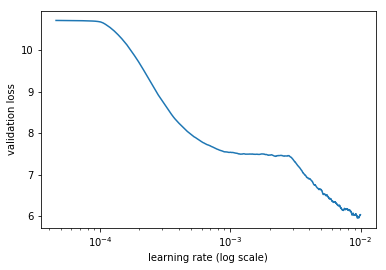

In [52]:
learner.sched.plot()

In [50]:
lr=1e-3
lrs = lr

In [52]:
learner.load('news_LM')

In [53]:
learner.fit(lrs, 5, wds=wd, use_clr=(20,10), cycle_len=15)


epoch      trn_loss   val_loss   accuracy                     
    0      4.148626   5.03116    0.226647  
    1      4.250771   5.047802   0.224713                     
    2      4.304603   5.040141   0.225326                     
    3      4.255172   5.036219   0.225684                     
    4      4.323801   5.016485   0.226707                     
    5      4.151685   5.030256   0.227471                     
    6      4.179784   5.024665   0.226944                     
    7      4.124536   5.018256   0.228459                     
    8      4.089547   5.018955   0.229405                     
    9      4.095399   5.018171   0.229185                     
    10     4.031234   5.021676   0.229044                     
    11     4.111572   5.00962    0.230145                     
    12     3.943506   5.016498   0.230516                     
    13     3.922315   5.016849   0.230894                     
    14     3.990867   5.018164   0.230943                     
    15     

KeyboardInterrupt: 

In [54]:
learner.save('news_LM')


In [55]:
learner.save_encoder('LM_enc')

In [56]:
m = learner.model
m.eval()

SequentialRNN(
  (0): RNN_Encoder(
    (encoder): Embedding(45303, 400, padding_idx=1)
    (encoder_with_dropout): EmbeddingDropout(
      (embed): Embedding(45303, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDrop(
        (module): LSTM(400, 1150)
      )
      (1): WeightDrop(
        (module): LSTM(1150, 1150)
      )
      (2): WeightDrop(
        (module): LSTM(1150, 1150)
      )
      (3): WeightDrop(
        (module): LSTM(1150, 400)
      )
    )
    (dropouti): LockedDropout(
    )
    (dropouths): ModuleList(
      (0): LockedDropout(
      )
      (1): LockedDropout(
      )
      (2): LockedDropout(
      )
      (3): LockedDropout(
      )
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=45303, bias=False)
    (dropout): LockedDropout(
    )
  )
)

# Generate text

In [91]:
sen = "سیب زمینی"

In [92]:
idxs = np.array([[stoi[p] for p in sen.strip().split(" ")]])
idxs

array([[4226, 2525]])

In [93]:
p = m(VV(idxs))
type(p), len(p)

(tuple, 3)

In [94]:
p[0].shape, [x.shape for x in p[1]], [x.shape for x in p[2]]

(torch.Size([2, 45303]),
 [torch.Size([1, 2, 1150]),
  torch.Size([1, 2, 1150]),
  torch.Size([1, 2, 1150]),
  torch.Size([1, 2, 400])],
 [torch.Size([1, 2, 1150]),
  torch.Size([1, 2, 1150]),
  torch.Size([1, 2, 1150]),
  torch.Size([1, 2, 400])])

In [95]:
t = np.array([[stoi[p] for p in sen.strip().split(" ")]])
t

array([[4226, 2525]])

In [100]:
# Set batch size to 1
m[0].bs=1
# Turn off dropout
m.eval()
# Reset hidden state
m.reset()
# Get predictions from model
res,*_ = m(VV(t))
# Put the batch size back to what it was
m[0].bs=bs

In [101]:
nexts = torch.topk(res[-1], 10)[1]
[itos[o] for o in to_np(nexts)]

['که', 'به', 'و', 'است', '_unk_', 'در', 'با', 'از', 'هستند', 'را']

In [102]:
n=res[-1].topk(2)[1]
n = n[1] if n.data[0]==0 else n[0]

In [103]:
n.data[0] = stoi['تیم']
# .itos[n.data[0]]
res,*_ = m(n[0].unsqueeze(0))
print(itos[n.data[0]], end=' ')
for i in range(50):
    n=res[-1].topk(2)[1]
    
    n = n[1] if n.data[0]==0 else n[0]
#     n = n[random.randint(0,1)]
    print(itos[n.data[0]], end=' ')
    res,*_ = m(n[0].unsqueeze(0))
print('...')

تیم تحقیق و تفحص از این شرکت ها به صورت شبانه روزی به صورت شبانه روزی به محل اعزام شدند. 
 xbos xfld 1 رئیس سازمان بسیج مستضعفین گفت : در حوزه فرهنگ و هنر همواره در حوزه فرهنگ و هنر به عنوان یک نهاد اجتماعی موفق هستیم و در این ...
